In [174]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m14/datasets/bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,NaN,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,NaN,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,NaN,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,NaN,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,NaN,0,NaN,no


In [175]:
# Setup X and y variables
X = df.drop(columns='y')
y = df['y'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,33908.000000,33908.000000,33908.000000,33908.000000,33908.000000,6238.000000,33908.000000
mean,40.972573,1377.059838,15.784682,257.013124,2.761679,224.901892,0.577209
std,10.655445,3112.714530,8.311877,253.956828,3.097215,114.702336,1.929730
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,450.500000,16.000000,179.500000,2.000000,195.000000,0.000000
75%,48.000000,1433.250000,21.000000,319.000000,3.000000,327.750000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,871.000000,58.000000


# Missing Values

In [176]:
# Find the percentage of null values in each column
X_train.isna().sum()/len(X_train)

age          0.000000
job          0.006400
marital      0.000000
education    0.041318
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.288015
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.816032
previous     0.000000
poutcome     0.816150
dtype: float64

In [177]:
# Explore each column with missing values to determine the best fill strategy
# First the job column
X_train['job'].value_counts()

blue-collar      7235
management       7112
technician       5740
admin.           3899
services         3123
retired          1716
self-employed    1183
entrepreneur     1112
unemployed        966
housemaid         917
student           688
Name: job, dtype: int64

In [178]:
# The job column is varied and the number of missing values is small
# It might suffice to fill the missing values with "unknown"
# We'll make a function to handle this.
def fill_job(X_data):
    X_data['job'] = X_data['job'].fillna('unknown')
    return X_data

In [179]:
# Education is next
X_train['education'].value_counts()

secondary    17446
tertiary      9940
primary       5121
Name: education, dtype: int64

In [180]:
X_train.loc[X_train['education'].isna()].describe()

,age,balance,day,duration,campaign,pdays,previous
count,1401.000000,1401.000000,1401.000000,1401.000000,1401.000000,240.000000,1401.000000
mean,44.535332,1571.662384,15.633833,254.278373,2.827980,220.083333,0.497502
std,12.313480,3342.098606,8.640154,237.701724,3.756475,114.831955,1.631003
min,18.000000,-1445.000000,1.000000,4.000000,1.000000,2.000000,0.000000
25%,36.000000,109.000000,8.000000,100.000000,1.000000,108.500000,0.000000
50%,44.000000,573.000000,16.000000,179.000000,2.000000,194.500000,0.000000
75%,53.000000,1728.000000,21.000000,332.000000,3.000000,313.500000,0.000000
max,93.000000,64343.000000,31.000000,1812.000000,63.000000,683.000000,27.000000


In [181]:
X_train.loc[X_train['education'].isna(), 'job'].value_counts()

blue-collar      343
technician       190
management       175
admin.           139
student          118
services         107
retired           90
entrepreneur      59
housemaid         36
self-employed     27
unemployed        22
Name: job, dtype: int64

In [182]:
# The vast majority of rows missing an education value
# have a job which wouldn't require a higher education
# Lets fillna for education with 'primary', but 'unknown'
# might be a good choice as well

def fill_education(X_data):
    X_data['education'] = X_data['education'].fillna('primary')
    return X_data

In [183]:
# Now for the contact column
X_train['contact'].value_counts()

cellular     21951
telephone     2191
Name: contact, dtype: int64

In [184]:
X_train.loc[X_train['contact'].isna()].describe()

,age,balance,day,duration,campaign,pdays,previous
count,9766.000000,9766.000000,9766.000000,9766.000000,9766.000000,48.000000,9766.000000
mean,40.622875,1195.214622,15.378558,250.010956,2.805755,415.229167,0.021298
std,9.448261,2639.421221,8.450897,253.718693,3.450365,244.150045,0.536585
min,20.000000,-3372.000000,1.000000,0.000000,1.000000,75.000000,0.000000
25%,33.000000,52.000000,8.000000,100.000000,1.000000,163.000000,0.000000
50%,39.000000,387.000000,15.000000,177.000000,2.000000,394.000000,0.000000
75%,48.000000,1259.000000,21.000000,310.000000,3.000000,608.250000,0.000000
max,61.000000,56831.000000,31.000000,3881.000000,63.000000,850.000000,41.000000


In [185]:
X_train.loc[X_train['contact'].isna(), 'education'].value_counts()

secondary    5390
tertiary     1971
primary      1898
Name: education, dtype: int64

In [186]:
X_train.loc[X_train['contact'].isna(), 'job'].value_counts()

blue-collar      2955
management       1479
technician       1432
admin.           1152
services         1074
retired           364
entrepreneur      330
self-employed     302
housemaid         244
unemployed        243
student           104
Name: job, dtype: int64

In [187]:
# This one is harder to find; we'll just fillna
# using 'unknown' for this one

def fill_contact(X_data):
    X_data['contact'] = X_data['contact'].fillna('unknown')
    return X_data


<Axes: ylabel='Frequency'>

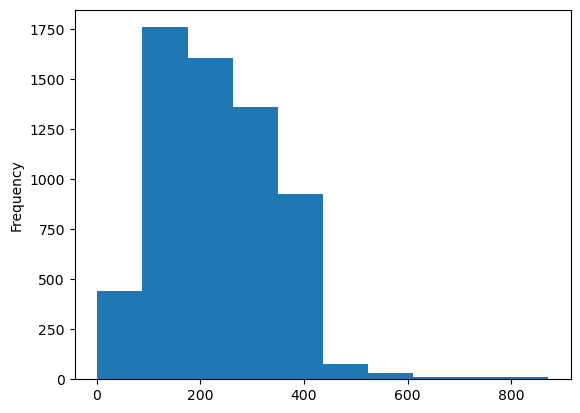

In [188]:
# Next is pdays
# This column says how many days it has been since the last 
# marketing contact for this client

X_train['pdays'].plot(kind='hist')

In [189]:
X_train.loc[X_train['pdays'].isna()].describe()

,age,balance,day,duration,campaign,pdays,previous
count,27670.000000,27670.000000,27670.000000,27670.000000,27670.000000,0.0,27670.0
mean,40.948030,1332.885544,16.134803,255.967185,2.921793,NaN,0.0
std,10.471537,3101.096022,8.360263,258.028655,3.327861,NaN,0.0
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,NaN,0.0
25%,33.000000,57.000000,9.000000,101.000000,1.000000,NaN,0.0
50%,39.000000,416.000000,17.000000,176.000000,2.000000,NaN,0.0
75%,49.000000,1361.000000,22.000000,317.000000,3.000000,NaN,0.0
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,NaN,0.0


In [190]:
# Hmm... previous has some interesting output, lets explore that
X_train.loc[X_train['pdays'].isna(), 'previous'].value_counts()

0    27670
Name: previous, dtype: int64

In [191]:
# According to the information about the dataset,
# a zero in the 'previous' column means that this client
# has not been contacted before! Lets put a -1 in place
# of the NaNs to indicate this importance to the model.

def fill_pdays(X_data):
    X_data['pdays'] = X_data['pdays'].fillna(-1)
    return X_data

In [192]:
# Lastly is poutcome

X_train['poutcome'].value_counts()

failure    3706
other      1400
success    1128
Name: poutcome, dtype: int64

In [193]:
# The number of missing values in this column 
# closely matched that of pdays
# Lets check the 'previous' column

X_train.loc[X_train['poutcome'].isna(), 'previous'].value_counts()

0    27670
2        1
5        1
1        1
7        1
Name: previous, dtype: int64

In [194]:
# Since the vast majority of missing data didn't have a previous
# campaign, we can fill the data with 'nonexistent'. 

def fill_poutcome(X_data):
    X_data['poutcome'] = X_data['poutcome'].fillna('nonexistent')
    return X_data

In [195]:
# Lets combine all our missing data functions into a single function
def fill_missing(X_data):
    X_data = fill_job(X_data)
    X_data = fill_education(X_data)
    X_data = fill_contact(X_data)
    X_data = fill_pdays(X_data)
    X_data = fill_poutcome(X_data)
    return X_data

In [196]:
# Lets apply this fill missing function to our data before 
# moving on to encoding
X_train_filled = fill_missing(X_train)
X_test_filled = fill_missing(X_test)

# Categorical Variables

In [197]:
X_train_filled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10937,33,self-employed,divorced,secondary,no,969,yes,no,unknown,17,jun,166,2,-1.0,0,nonexistent
11047,50,services,divorced,tertiary,no,580,no,no,unknown,17,jun,88,2,-1.0,0,nonexistent
30115,27,services,married,secondary,no,199,no,no,cellular,4,feb,108,2,195.0,6,failure
28988,36,blue-collar,single,primary,no,367,no,no,cellular,2,feb,217,1,221.0,1,failure
24026,57,retired,married,tertiary,no,42,no,no,cellular,29,aug,68,4,-1.0,0,nonexistent


In [198]:
# First is job
X_train_filled['job'].value_counts()

blue-collar      7235
management       7112
technician       5740
admin.           3899
services         3123
retired          1716
self-employed    1183
entrepreneur     1112
unemployed        966
housemaid         917
student           688
unknown           217
Name: job, dtype: int64

In [199]:
# Lots of unique values, not ordinal data
# Lets convert to no more than 5 categories

encode_job = OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist', sparse_output=False)

# Train the encoder
encode_job.fit(X_train_filled['job'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
              sparse_output=False)

In [200]:
# Next is marital
X_train_filled['marital'].value_counts()

married     20422
single       9555
divorced     3931
Name: marital, dtype: int64

In [201]:
# Only three values; lets use two OneHotEncoded columns
# remembering to choose options for unknown values
encode_marital = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_marital.fit(X_train_filled['marital'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [202]:
# Next is education
X_train_filled['education'].value_counts()

secondary    17446
tertiary      9940
primary       6522
Name: education, dtype: int64

In [203]:
# This is ordinal! Lets use the ordinal encoder
# We'll set any unknown values to -1
encode_education = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_education.fit(X_train_filled['education'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [204]:
# Next is default
X_train_filled['default'].value_counts()

no     33308
yes      600
Name: default, dtype: int64

In [205]:
# Lets make this an Ordinal column
encode_default = OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_default.fit(X_train_filled['default'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [206]:
# Next is housing
X_train_filled['housing'].value_counts()

yes    18846
no     15062
Name: housing, dtype: int64

In [207]:
# Lets make this an Ordinal column
encode_housing= OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_housing.fit(X_train_filled['housing'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [208]:
# Next is loan
X_train_filled['loan'].value_counts()

no     28458
yes     5450
Name: loan, dtype: int64

In [209]:
# Lets make this an Ordinal column
encode_loan = OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_loan.fit(X_train_filled['loan'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [210]:
# Next is contact
X_train_filled['contact'].value_counts()

cellular     21951
unknown       9766
telephone     2191
Name: contact, dtype: int64

In [211]:
# Lets use two OneHotEncoded columns
encode_contact = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_contact.fit(X_train_filled['contact'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [212]:
# Next is month
X_train_filled['month'].value_counts()

may    10333
jul     5160
aug     4701
jun     3999
nov     3007
apr     2215
feb     1950
jan     1032
oct      547
sep      438
mar      351
dec      175
Name: month, dtype: int64

In [213]:
# This month seems ordinal by may not behave that way...
# Lets use ordinal for now, but consider experimenting with this!
encode_month = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_month.fit(X_train_filled['month'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                            'aug', 'sep', 'oct', 'nov', 'dec']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [214]:
# Next is the poutcome column
X_train_filled['poutcome'].value_counts()

nonexistent    27674
failure         3706
other           1400
success         1128
Name: poutcome, dtype: int64

In [215]:
# Lets use OneHotEncoding for this
encode_poutcome = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_poutcome.fit(X_train_filled['poutcome'].values.reshape(-1, 1))


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [216]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index()

    # Multicolumn encoders first
    job_encoded_df = pd.DataFrame(encode_job.transform(X_data['job'].values.reshape(-1, 1)), columns=encode_job.get_feature_names_out())
    marital_encoded_df = pd.DataFrame(encode_marital.transform(X_data['marital'].values.reshape(-1, 1)), columns=encode_marital.get_feature_names_out())
    contact_encoded_df = pd.DataFrame(encode_contact.transform(X_data['contact'].values.reshape(-1, 1)), columns=encode_contact.get_feature_names_out())
    poutcome_encoded_df = pd.DataFrame(encode_poutcome.transform(X_data['poutcome'].values.reshape(-1, 1)), columns=encode_poutcome.get_feature_names_out())

    # Concat all dfs together
    dfs = [X_data_numeric, job_encoded_df, marital_encoded_df, contact_encoded_df, poutcome_encoded_df]
    X_data_encoded = pd.concat(dfs, axis=1)

    # Add single column encoders
    X_data_encoded['education'] = encode_education.transform(X_data['education'].values.reshape(-1, 1))
    X_data_encoded['default'] = encode_default.transform(X_data['default'].values.reshape(-1, 1))
    X_data_encoded['housing'] = encode_housing.transform(X_data['housing'].values.reshape(-1, 1))
    X_data_encoded['loan'] = encode_loan.transform(X_data['loan'].values.reshape(-1, 1))
    X_data_encoded['month'] = encode_month.transform(X_data['month'].values.reshape(-1, 1))
    
    return X_data_encoded

In [217]:
# Apply the encoding function to both training and testing
X_train_encoded = encode_categorical(X_train_filled)
X_test_encoded = encode_categorical(X_test_filled)

In [218]:
# Check the final X_train data
X_train_encoded.head()

,index,age,balance,day,duration,campaign,pdays,previous,x0_admin.,x0_blue-collar,...,x0_telephone,x0_unknown,x0_nonexistent,x0_other,x0_success,education,default,housing,loan,month
0,10937,33,969,17,166,2,-1.0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0
1,11047,50,580,17,88,2,-1.0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0
2,30115,27,199,4,108,2,195.0,6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,28988,36,367,2,217,1,221.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24026,57,42,29,68,4,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,7.0


In [219]:
# Wait! Don't forget the y data!
y_train

array([['no'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [220]:
# Create a OneHotEncoder
encode_y = OneHotEncoder(drop='first', sparse_output=False)

# Train the encoder
encode_y.fit(y_train)

# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
y_train_encoded

array([0., 0., 0., ..., 0., 0., 0.])

In [231]:
# Create and train an SVC model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [232]:
# Check the model's balanced accuracy on the test set

y_test_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.7272296932544065


In [233]:
# Check the model's balanced accuracy on the training set

y_train_pred = model.predict(X_train_encoded)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

1.0


In [235]:
# We overfit! Lets try varying the max depth

models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train_encoded, y_train_encoded)
    y_test_pred = model.predict(X_test_encoded)
    y_train_pred = model.predict(X_train_encoded)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

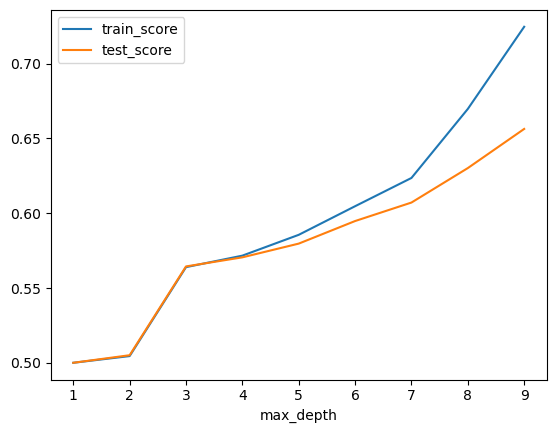

In [236]:
models_df.plot(x='max_depth')

In [237]:
# it looks like the lines start to diverge a lot after 7
# Create and train a RandomForest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 7, n_estimators=100)
model.fit(X_train_encoded, y_train_encoded)

y_train_pred = model.predict(X_train_encoded)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

y_test_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.6287495408330733
0.6106526829255281
